<a style="font-size: 38px; font-weight: bold; color: 40B3FF; text-decoration: none;">Titanic Survival Prediction</a>


In [1]:
import pandas as pd
data=pd.read_csv(r"C:\Users\Dell\Downloads\Titanic-Dataset (1) (1).xls")

 <a id="toc"></a>
<a style="font-size: 32px; font-weight: bold; color: 40B3FF; text-decoration: none;">Table of Contents</a>
- [Data Used](#data-used)
- [EDA](#eda)
- [ML Model](#ml-model)
- [Prediction](#prediction)
- [Model Evaluation](#model-performance)
- [Conclusion](#conclusion)

<a id="data-used"></a>
<a href="#toc" style="font-size: 38px; font-weight: bold; color: 40B3FF; text-decoration: none;">Data Used </a>

In [2]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<a id="eda"></a>
<a href="#toc" style="font-size: 38px; font-weight: bold; color: 40B3FF; text-decoration: none;">EDA</a>


## Data Infromation

This dataset contains information about 891 passengers, with columns for personal details (e.g., age, gender, name), travel details (e.g., ticket, class, fare), and survival status, including some missing values in the Age, Cabin, and Embarked columns.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Null Value

This shows the percentage of missing values in each column, with the highest missing data in the Age (19.87%), Cabin (77.10%), and Embarked (0.22%) columns.

In [4]:
data.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

## Handle Missing Data
Fill the missing Age values with the mean,  drop the cabin column, and fill missing Embarked values with the most frequent value.

In [5]:
data=data.drop('Cabin', axis=1)

In [6]:
## fillna 

In [7]:
data['Age']=data['Age'].fillna(28.0)

In [8]:
data['Embarked']=data['Embarked'].fillna('S')

In [9]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

## Check Duplicate Data 

In [10]:
data.duplicated().any()

False

## Categorical columns

In [11]:
for col in data.columns:
    if data[col].nunique() <=10:
        print(col)


Survived
Pclass
Sex
SibSp
Parch
Embarked


## Continous Columns

In [12]:
for col in data.columns:
    if data[col].nunique() >10:
        print(col)

PassengerId
Name
Age
Ticket
Fare


## Data Types

In [13]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

## Label Encoding 

LabelEncoder from sklearn to convert categorical columns (Name, Sex, Ticket, Embarked) into numerical values by assigning a unique integer to each category

In [14]:
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()

data['Name']=lb.fit_transform(data['Name'])
data['Sex']=lb.fit_transform(data['Sex'])
data['Ticket']=lb.fit_transform(data['Ticket'])
data['Embarked']=lb.fit_transform(data['Embarked'])    
    
    

##  Histogram to check weather the data is normally distributed or not
The histogram shows that the age data is normally distributed, while the ticket and fare distributions do not follow a normal distribution

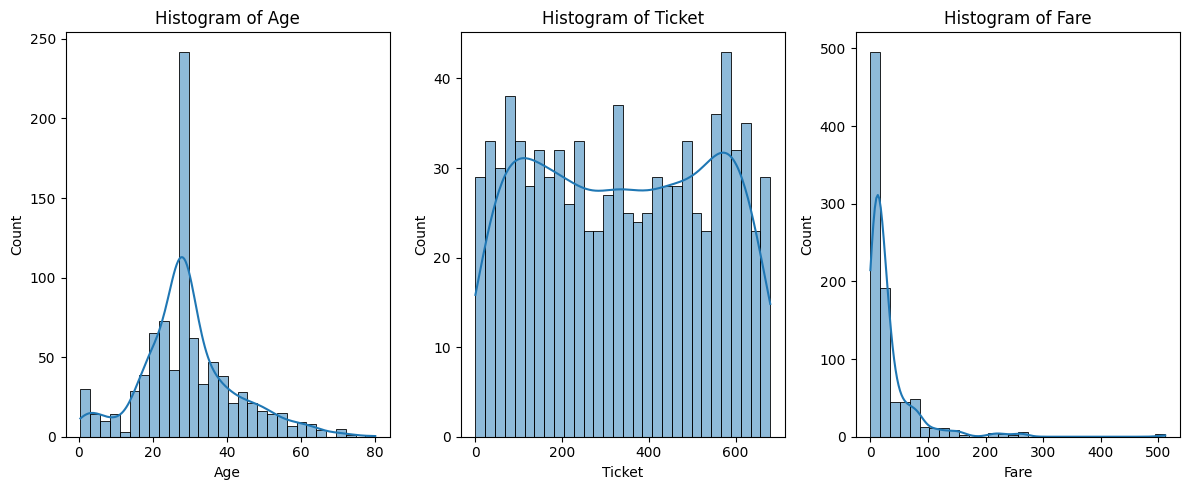

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

continous_columns = ['Age', 'Ticket', 'Fare']  

plt.figure(figsize=(12, 5))  

for i, column in enumerate(continous_columns, 1):
    plt.subplot(1, len(continous_columns), i)  
    sns.histplot(data[column], bins=30, kde=True) 
    plt.title(f'Histogram of {column}')

plt.tight_layout() 
plt.show()


## Box plot to check the outliers in the data 
The boxplot indicates that age and fare contain outliers, while the ticket data does not show any outliers

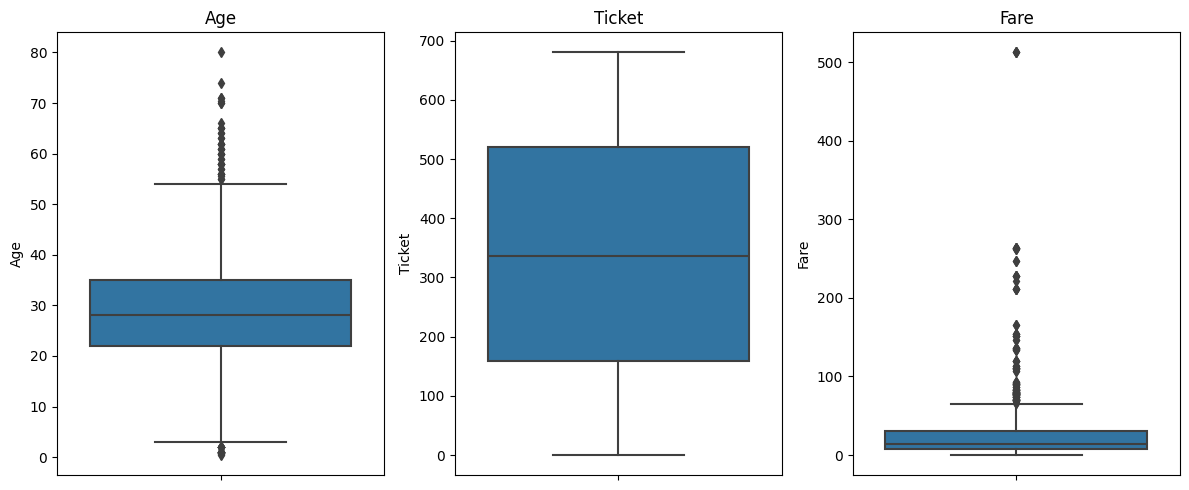

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

continous_columns = ['Age', 'Ticket', 'Fare']

plt.figure(figsize=(12, 5))  

for i, column in enumerate(continous_columns, 1):
    plt.subplot(1, len(continous_columns), i)  
    sns.boxplot(y=data[column])  
    plt.title(column)

plt.tight_layout() 
plt.show()


## The Z-score method was applied to the age data, which follows a normal distribution, while the IQR method was used for the fare data, which is not normally distributed.

### Z-score
The Z-score is a statistical measurement that describes a data point's relationship to the mean of a group of data. It is expressed as the number of standard deviations a data point is from the mean. A Z-score can be positive or negative, depending on whether the data point is above or below the mean. It helps standardize data, allowing comparison between different datasets or distributions, even if they have different scales.

For example, when using a threshold of 3, any data points with a Z-score greater than 3 or less than -3 are considered outliers, as they are more than 3 standard deviations away from the mean.

threshold=3
    
data=data[(z_score<threshold)&(z_score>-threshold)]

z_score < threshold: This condition keeps data points with Z-scores less than 3, meaning they are within 3 standard deviations above the mean.

z_score > -threshold: This condition keeps data points with Z-scores greater than -3, meaning they are within 3 standard deviations below the mean.

### IQR(Inter Quartile Range)

The IQR (Interquartile Range) method is used to replace outliers in the 'Fare' column. It calculates the IQR as:
    
Calculate iqr

IQR=q3-q1


Calculate upper bound and lower bound

lower_bound=q1-1.5*IQR

upper_bound=q3+1.5*IQR

Any values outside these bounds are replaced with the respective quartiles (Q1 or Q3).


In [17]:
from scipy.stats import zscore

columns_to_check=data[['Age']]

for col in columns_to_check:
    z_score=zscore(data[col])
    
    
    threshold=3
    
    data=data[(z_score<threshold)&(z_score>-threshold)]

In [18]:
numerical_columns=['Fare']

df_cleaned=data.copy()


def replace_outlier_iqr(df, column):
    q1=data[column].quantile(0.25)
    q3=data[column].quantile(0.75)
    
    # calculate iqr
    IQR=q3-q1
    
    # calculate upper bound and lower bound
    
    lower_bound=q1-1.5*IQR
    upper_bound=q3+1.5*IQR
    
    # replace values below the lower bound with q1
    data[column]=data[column].apply(lambda x:q1 if x<lower_bound else x)
    
    # replace values below the upper bound with q3
    data[column]=data[column].apply(lambda x:q3 if x>upper_bound else x)
    
    return data

for column in numerical_columns:
    df_cleaned=replace_outlier_iqr(df_cleaned, column)
#print("Original data shape:", data.shape)
#print("Cleaned data shape:",df_cleaned.shape )
    

## Feature Selection
Uses the Chi-squared test with SelectKBest to evaluate the relationship between features ('Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked') and the target ('Survived'), calculates the p-values for each feature, and sorts them in ascending order to identify the most statistically significant features

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

a=data[['Pclass', 'Sex', 'SibSp',
       'Parch', 'Embarked']]
b=data['Survived']

chi2_selector=SelectKBest(chi2, k='all')
x_new=chi2_selector.fit_transform(a, b)

p_values=chi2_selector.pvalues_


p_values_df=pd.DataFrame({
    'Feature':a.columns,
    'P-value':p_values
})

p_values_df=p_values_df.sort_values(by='P-value')



In [20]:
p_values_df

,Feature,P-value
1,Sex,6.173783e-22
0,Pclass,2.391743e-08
4,Embarked,1.093649e-03
3,Parch,1.632507e-03
2,SibSp,9.792078e-02


Lower p-value = Stronger evidence against the null hypothesis (i.e., the variable is significantly related to survival).

Threshold (α = 0.05): If p-value < 0.05, the feature is statistically significant.

Keep Sex, Pclass, Embarked, and Parch in modeling.

Drop or reconsider SibSp unless there’s domain knowledge suggesting it’s important.

## Dependent and Independent variable

In [21]:
x=data[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked']]
y=data['Survived']

x

In [22]:
x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,108,1,22.0,1,0,523,7.250,2
1,2,1,190,0,38.0,1,0,596,31.000,0
2,3,3,353,0,26.0,0,0,669,7.925,2
3,4,1,272,0,35.0,1,0,49,53.100,2
4,5,3,15,1,35.0,0,0,472,8.050,2
...,...,...,...,...,...,...,...,...,...,...
886,887,2,548,1,27.0,0,0,101,13.000,2
887,888,1,303,0,19.0,0,0,14,30.000,2
888,889,3,413,0,28.0,1,2,675,23.450,2
889,890,1,81,1,26.0,0,0,8,30.000,0


y

In [23]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 884, dtype: int64

## Train Test Split 

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train , y_test=train_test_split(x, y, test_size=0.2, random_state=42)

x_train number of rows and columns

In [25]:
x_train.shape

(707, 10)

x_test number of rows and columns

In [26]:
x_test.shape

(177, 10)

y_train number of rows and columns

In [27]:
y_train.shape

(707,)

y_test number of rows and columns

In [28]:
y_test.shape

(177,)

## Normalize the feature data (using StandardScaler)

In [29]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_test

In [30]:
x_test

array([[-1.5785586 ,  0.80120005, -0.90646425, ..., -0.26163753,
        -0.85019864, -0.68706875],
       [-0.22659635, -1.59900519, -1.16968075, ..., -1.51264128,
         0.86395898,  0.58122787],
       [ 0.7580698 ,  0.80120005,  1.20700935, ...,  0.0146886 ,
         0.63412746,  0.58122787],
       ...,
       [ 0.19540343, -1.59900519, -1.65740542, ..., -1.49254483,
         0.86395898,  0.58122787],
       [-1.63716968,  0.80120005,  1.41990505, ...,  0.14029138,
        -0.84896793,  0.58122787],
       [-0.7775405 , -0.39890257, -1.15806825, ..., -0.95496491,
         0.49326298,  0.58122787]])

<a id="ml-model"></a>
<a href="#toc" style="font-size: 38px; font-weight: bold; color: 40B3FF; text-decoration: none;">ML Model</a> 

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam



## Logistic Regression

In [32]:
lr=LogisticRegression()
lr.fit(x_train, y_train)


LogisticRegression()

## Random Forest Classifier

In [33]:
rf=RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

## Multilayer Perceptron (MLP)
Trains a neural network with two hidden layers using the ReLU activation function, compiles it with the Adam optimizer and binary cross-entropy loss for binary classification, trains it for 20 epochs, evaluates its performance on the test set, and calculates accuracy and loss.

In [34]:
# Build Neural Network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

# Evaluate
loss, accuracy = model.evaluate(x_test, y_test)
#print(f"Test Accuracy: {accuracy:.4f}")


C:\Users\Dell\Downloads\anoconda\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.6015 - loss: 0.6645 - val_accuracy: 0.6893 - val_loss: 0.6064
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7699 - loss: 0.5630 - val_accuracy: 0.7288 - val_loss: 0.5476
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8397 - loss: 0.4679 - val_accuracy: 0.7684 - val_loss: 0.5080
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8242 - loss: 0.4328 - val_accuracy: 0.7910 - val_loss: 0.4874
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8680 - loss: 0.3783 - val_accuracy: 0.8079 - val_loss: 0.4783
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8542 - loss: 0.3596 - val_accuracy: 0.7910 - val_loss: 0.4835
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8291 - loss: 0.4127 - val_accuracy: 0.8023 - val_loss: 0.4758
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8199 - loss: 0.3976 - val_accuracy: 0.7966 - val_loss

### Model summary

In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,453 (33.02 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,636 (22.02 KB)

Dense Layer 1 (dense): This layer has 64 neurons and takes the input from the previous layer (which could be the input data). It has 704 parameters (weights and biases) that need to be learned.

Dense Layer 2 (dense_1): This layer has 32 neurons and connects to the previous 64-neuron layer. It has 2,080 parameters to be learned.

Dense Layer 3 (dense_2): This is the output layer with 1 neuron, suitable for binary classification. It has 33 parameters to be learned.

The model consists of 8,453 total parameters, with 2,817 trainable parameters, and 5,636 optimizer parameters, where each layer's output shape and number of parameters are designed to process and learn from the input data for binary classification.

<a id="prediction"></a>
<a href="#toc" style="font-size: 38px; font-weight: bold; color: 40B3FF; text-decoration: none;">Prediction</a>


In [36]:
prediction1=lr.predict(x_test)

prediction2=rf.predict(x_test)


In [37]:
# Make predictions
predictions = model.predict(x_test)

# Convert probabilities to binary values (0 or 1)
predicted_classes = (predictions > 0.5).astype('int32')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [38]:
df=pd.DataFrame({'Actual':y_test, 'LR':prediction1,'RF':prediction2, 'MLP': predicted_classes.flatten()}) 
# Flatten to ensure it's 1D for neural network

In [39]:
df.head(10)

,Actual,LR,RF,MLP
44,1,1,1,1
390,1,0,1,0
642,0,1,0,0
744,1,0,0,0
886,0,0,0,0
845,0,0,0,0
335,0,0,0,0
302,0,0,1,0
122,0,0,0,0
866,1,1,1,1


<a id="model-performance"></a>
<a href="#toc" style="font-size: 38px; font-weight: bold; color: 40B3FF; text-decoration: none;">Model Evaluation</a>


## Logistic Regression Model Evaluation

Confusion Matrix:


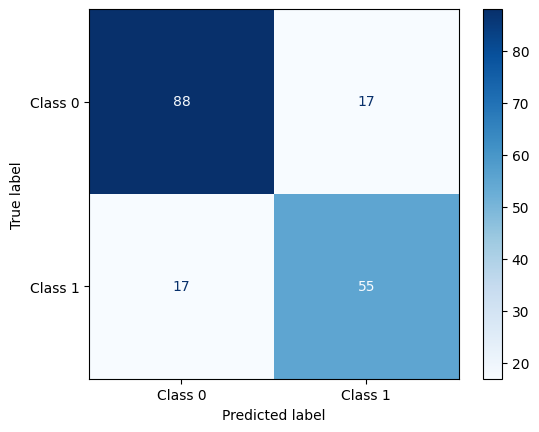

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate confusion matrix
cm = confusion_matrix(y_test, prediction1)
print("Confusion Matrix:")
#print(cm)

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues')
plt.show()

Out of the actual Class 0, 88 were correctly predicted as Class 0, and 17 were wrongly predicted as Class 1

Out of the actual Class 1, 17 were wrongly predicted as Class 0, and 55 were correctly predicted as Class 1

This model shows decent performance but has some errors in both classes

In [41]:
from sklearn.metrics import precision_score, accuracy_score, f1_score, recall_score

precision=precision_score(y_test, prediction1)
accuracy_score=accuracy_score(y_test, prediction1)
f1_score=f1_score(y_test, prediction1)
recall_score=recall_score(y_test, prediction1)

print(f"Precision:{precision:.2f}")
print(f"accuracy_score:{accuracy_score:.2f}")
print(f"f1_score:{f1_score:.2f}")
print(f"recall_score:{recall_score:.2f}")

Precision:0.76
accuracy_score:0.81
f1_score:0.76
recall_score:0.76


## Random Forest Classifier Model Evaluation

Confusion Matrix:


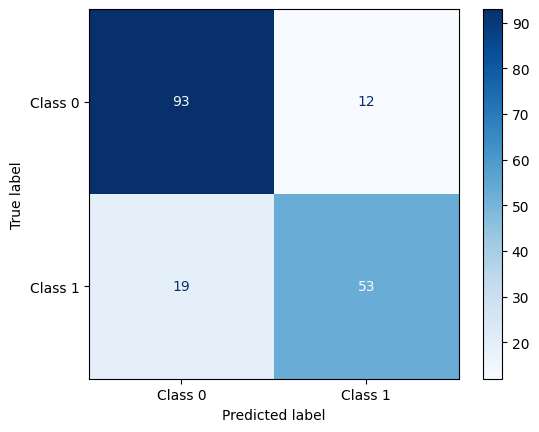

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate confusion matrix
cm = confusion_matrix(y_test, prediction2)
print("Confusion Matrix:")
#print(cm)

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues')
plt.show()

Out of the actual Class 0, 94 were correctly predicted as Class 0, and 11 were wrongly predicted as Class 1

Out of the actual Class 1, 19 were wrongly predicted as Class 0, and 53 were correctly predicted as Class 1

This model shows slightly better performance for Class 0 compared to logistic regression, but similar errors for Class 1

In [43]:
from sklearn.metrics import precision_score, accuracy_score, f1_score, recall_score

precision=precision_score(y_test, prediction2)
accuracy_score=accuracy_score(y_test, prediction2)
f1_score=f1_score(y_test, prediction2)
recall_score=recall_score(y_test, prediction2)

print(f"Precision:{precision:.2f}")
print(f"accuracy_score:{accuracy_score:.2f}")
print(f"f1_score:{f1_score:.2f}")
print(f"recall_score:{recall_score:.2f}")

Precision:0.82
accuracy_score:0.82
f1_score:0.77
recall_score:0.74


## Neural Network Model Evaluation


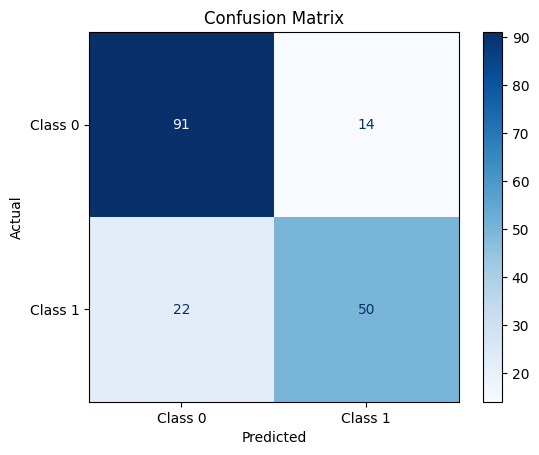

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 3. Compute confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

# 4. Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])

# 5. Plot the confusion matrix using the display method
disp.plot(cmap='Blues', values_format='d')

# Add titles and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.show()

# Print the confusion matrix as a table for reference
#print("Confusion Matrix:")
#print(cm)


Out of the actual Class 0, 91 were correctly predicted as Class 0, and 14 were wrongly predicted as Class 1

Out of the actual Class 1, 19 were wrongly predicted as Class 0, and 53 were correctly predicted as Class 1

This model's performance falls between the first two models for Class 0 predictions, while maintaining similar performance for Class 1

In [45]:
from sklearn.metrics import precision_score, accuracy_score, f1_score, recall_score

precision=precision_score(y_test, predicted_classes)
accuracy_score=accuracy_score(y_test, predicted_classes)
f1_score=f1_score(y_test, predicted_classes)
recall_score=recall_score(y_test, predicted_classes)

print(f"Precision:{precision:.2f}")
print(f"accuracy_score:{accuracy_score:.2f}")
print(f"f1_score:{f1_score:.2f}")
print(f"recall_score:{recall_score:.2f}")

Precision:0.78
accuracy_score:0.80
f1_score:0.74
recall_score:0.69


<a id="conclusion"></a>
<a href="#toc" style="font-size: 38px; font-weight: bold; color: 40B3FF; text-decoration: none;">Conclusion</a>

Looking at all three confusion matrices, Random Forest Classifier appears to be the best performing model because:

It has the highest number of correct predictions for Class 0 (94 compared to 88 and 91 in other models)

It has the lowest number of false positives (11 instances where Class 0 was incorrectly classified as Class 1, compared to 17 and 14 in other models)

The performance for Class 1 remains stable across all models (53 correct predictions)

While it has slightly more false negatives (19 instances where Class 1 was incorrectly classified as Class 0), this small difference is outweighed by its better performance in correctly identifying Class 0 cases